In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X, y = fetch_california_housing(return_X_y=True)

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X[:5]

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, -0.04901636, -0.82077735,
        -0.02584253,  1.03850269, -1.33282653],
       [ 0.93296751,  1.85618152,  0.15696608, -0.04983292, -0.76602806,
        -0.0503293 ,  1.03850269, -1.33781784],
       [-0.012881  ,  1.85618152,  0.3447108 , -0.03290586, -0.75984669,
        -0.08561576,  1.03850269, -1.33781784]])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [6]:
y_train[:5]

array([2.285, 2.799, 1.83 , 4.658, 1.5  ])

In [23]:
input = tf.keras.layers.Input(shape=X.shape[1:], name='InputLayer')
hidden1 = tf.keras.layers.Dense(6, activation='relu', name='hidden1')(input)
hidden2 = tf.keras.layers.Dense(3, activation='relu', name='hidden2')(hidden1)
merge = tf.keras.layers.Concatenate()([input, hidden2])
output = tf.keras.layers.Dense(1, name='OutputLayer')(merge)
model = tf.keras.models.Model(inputs = input, outputs = output, name='WideDeepNN')

In [8]:
model.summary()

Model: "WideDeepNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='sgd', loss='mse', metrics = ['root_mean_squared_error'])

In [10]:
%%capture
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

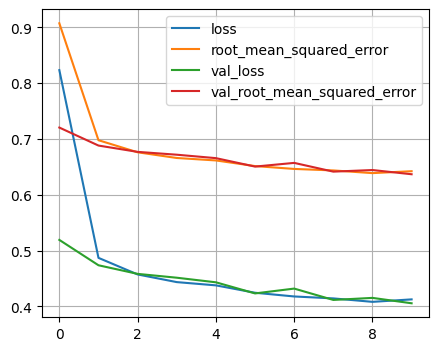

In [11]:
plt.figure(figsize = (5, 4))
dt = pd.DataFrame(history.history).plot(ax=plt.gca())
plt.grid()
plt.show()

In [12]:
loss, rmse = model.evaluate(X_val, y_val)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4076 - root_mean_squared_error: 0.6383


In [13]:
x = X_val[256:258]
x

array([[-0.74191443,  1.29997497, -0.42784065, -0.20399932, -0.19645879,
         0.02699068, -0.74997001,  0.71360941],
       [-0.00924899, -0.60701891, -0.16104525, -0.35933   ,  0.95151029,
         0.03906621, -0.72656068,  1.08296614]])

In [15]:
y = y_val[256:258]
y

array([1.805, 1.054])

In [16]:
y_pred = model.predict(x)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


array([[1.4109906],
       [1.3553314]], dtype=float32)

In [17]:
%%capture
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

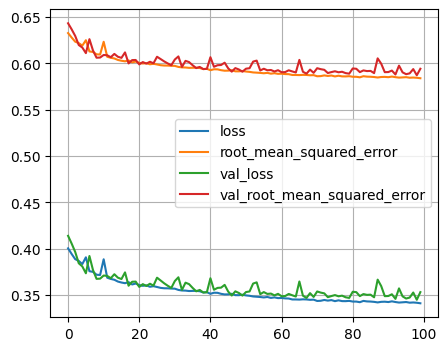

In [18]:
plt.figure(figsize = (5, 4))
dt = pd.DataFrame(history.history).plot(ax=plt.gca())
plt.grid()
plt.show()

In [19]:
loss, rmse = model.evaluate(X_val, y_val)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3555 - root_mean_squared_error: 0.5961


In [25]:
%%capture
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val))


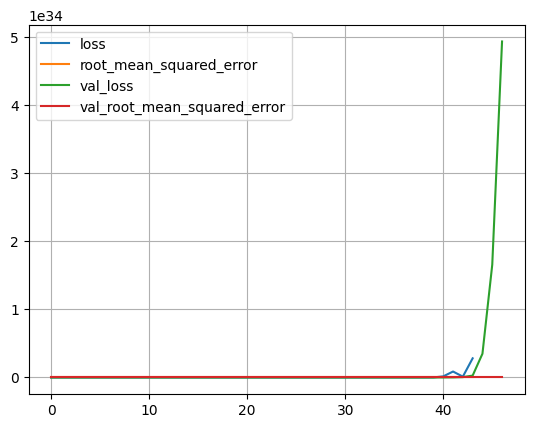

In [26]:
plt.figure(figsize = (5, 4))
dt = pd.DataFrame(history.history).plot(ax=plt.gca())
plt.grid()
plt.show()

In [27]:
loss, rmse = model.evaluate(X_val, y_val)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - root_mean_squared_error: nan
